<h1>Capstone Project - The Battle of the Neighborhoods</h1>
<h4>Using Foursqurea to identify best neighbourhoods in Greater Melbourne to visit </h4>

<h2>Introduction & Business Problem</h2>
Due to the Covid 19 pandamic small businessses have been effected in the areas of food and entertainment. Since Victoria has now come out of the pandemic, people can now travel around the state and experiance what Melbourne has to offer while helping out the businesses in need.

From this project we expect to identify places to visit within the Greater Melbourne area and recommend them to people who wants to visit. 

<h2>Data Sources</h2>

Since Greater Melbourne consists of multiple councils, The analysis was based on the counciles that construct Greater Melbourne in terms of Metropolitan, Inner suburbs and Outer suburb areas. 
This data can be readily found in wikipedia in the following link <a href> https://en.m.wikipedia.org/wiki/Local_government_areas_of_Victoria</a>.
<br>
Latitude Longitude coordinates of the council areas a obtained from the Geopy API. 


<h2>Data Exploration</h2>

In [1]:
#!pip install bs4
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('Install required apps')

Install required apps


In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



In [3]:
# Local Government areas of Victoria
html_data= requests.get("https://en.wikipedia.org/wiki/Local_government_areas_of_Victoria").text
soup = BeautifulSoup(html_data, "html.parser")


In [4]:
rows=[]
table=soup.find('a',title="City of Melbourne").parent.parent.parent.parent.parent.parent
for child in table.findAll('tr'):
    row = []
    for td in child:
        if (td.string):
            val = td.string.strip('\t\r\n')
            row.append(val)
    rows.append(list(filter(None, row)))
df = pd.DataFrame(rows[1:32],columns=['Local government','Council','Region','Area','Population','Pop Density','Councilors'])
df['Latitude'] = ''
df['Longitude'] = ''
df.drop(['Councilors'],axis=1,inplace=True)
df

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude
0,City of Melbourne,Melbourne,Inner Melbourne,37,"169,961","11,897",,
1,City of Port Phillip,St Kilda,Inner Melbourne,21,"113,200","13,961",,
2,City of Stonnington,Malvern,Inner Melbourne,26,"116,207","11,576",,
3,City of Yarra,Richmond,Inner Melbourne,20,"98,521","12,758",,
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,"130,237","5,354",,
5,City of Bayside,Sandringham,Metropolitan Melbourne,37,"105,718","7,400",,
6,City of Boroondara,Camberwell,Metropolitan Melbourne,60,"181,289","7,826",,
7,City of Darebin,Preston,Metropolitan Melbourne,54,"161,609","7,751",,
8,City of Glen Eira,Caulfield North,Metropolitan Melbourne,39,"153,858","10,218",,
9,City of Hobsons Bay,Altona,Metropolitan Melbourne,64,"96,470","3,904",,


In [5]:
for i in df['Council']:
    geolocator = Nominatim(user_agent="MelbExlorer")
    location = geolocator.geocode(i+',Victoria,Australia')
    df.loc[df['Council']==i,'Latitude'] = location.latitude
    df.loc[df['Council']==i,'Longitude'] = location.longitude
df

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude
0,City of Melbourne,Melbourne,Inner Melbourne,37,"169,961","11,897",-37.8142,144.963
1,City of Port Phillip,St Kilda,Inner Melbourne,21,"113,200","13,961",-37.8638,144.982
2,City of Stonnington,Malvern,Inner Melbourne,26,"116,207","11,576",-37.8584,145.035
3,City of Yarra,Richmond,Inner Melbourne,20,"98,521","12,758",-37.8204,145.003
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,"130,237","5,354",-37.704,145.108
5,City of Bayside,Sandringham,Metropolitan Melbourne,37,"105,718","7,400",-37.9503,145.004
6,City of Boroondara,Camberwell,Metropolitan Melbourne,60,"181,289","7,826",-37.8385,145.074
7,City of Darebin,Preston,Metropolitan Melbourne,54,"161,609","7,751",-37.7419,145.008
8,City of Glen Eira,Caulfield North,Metropolitan Melbourne,39,"153,858","10,218",-37.8708,145.022
9,City of Hobsons Bay,Altona,Metropolitan Melbourne,64,"96,470","3,904",-37.8672,144.829


In [6]:
df['Population'] = df['Population'].str.replace(',', '').astype(int)
df['Pop Density'] = df['Pop Density'].str.replace(',', '').astype(int)

<h2>Exploratory Data Analysis</h2>

<BarContainer object of 31 artists>

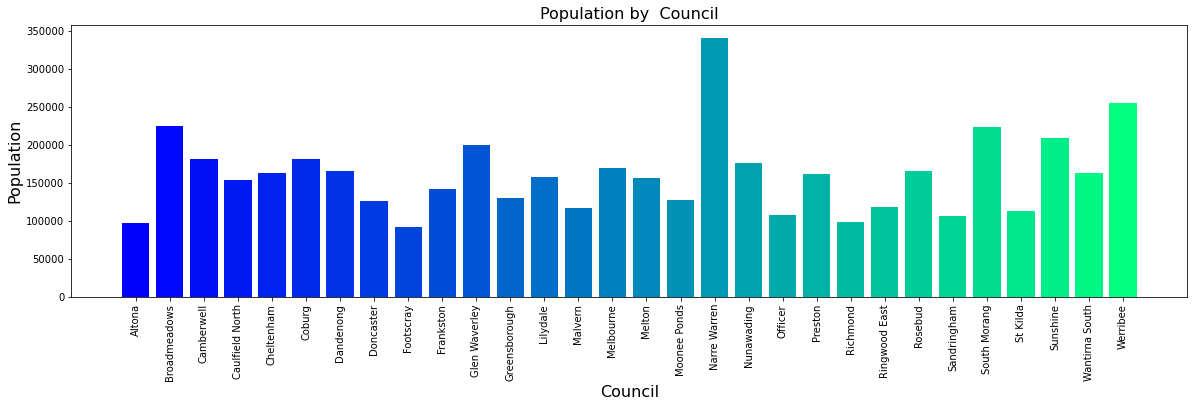

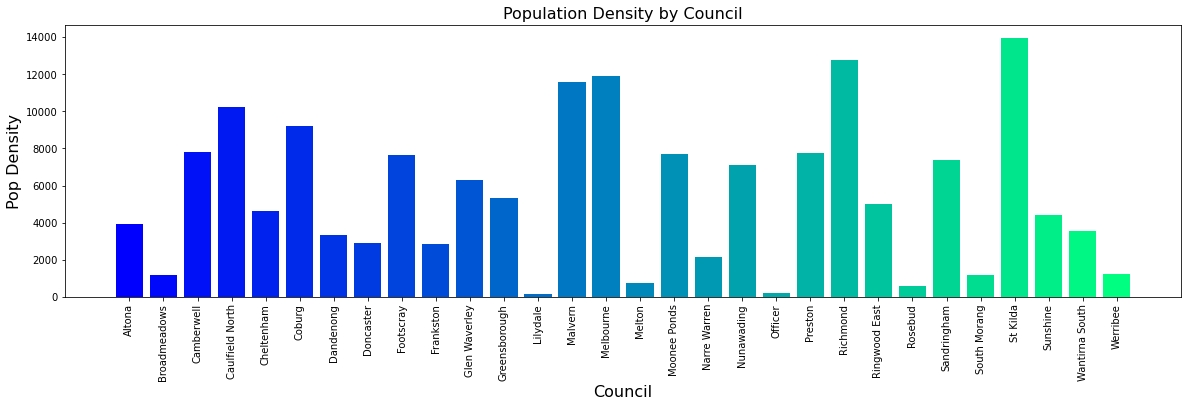

In [19]:
import matplotlib.pyplot as plt

df1 = df.sort_values('Council')
pop = df1['Population']
council = df1['Council']
popden = df1['Pop Density']

colors = cm.winter(np.linspace(0, 1, len(council)))

plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
plt.ylabel("Population", fontsize = 16)
plt.xlabel("Council", fontsize = 16)
plt.title("Population by  Council", fontsize = 16)
plt.bar(council, pop, color = colors)

plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
plt.ylabel("Pop Density", fontsize = 16)
plt.xlabel("Council", fontsize = 16)
plt.title("Population Density by Council", fontsize = 16)
plt.bar(council, popden, color = colors)

